In [188]:
%load_ext autoreload
%autoreload 1

import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append('../src')

from visualization import visualize

%aimport visualization.visualize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [237]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Clean

In [194]:
df_avg_polls.modeldate = df_avg_polls.modeldate.map(pd.to_datetime)

In [195]:
df_avg_polls.timestamp = df_avg_polls.timestamp.map(pd.to_datetime)

In [238]:
with open('../data/interim/polls.pickle', 'wb') as write_file:
    pickle.dump(df_avg_polls, write_file)

## EDA

### By Candidate

In [196]:
moderates = [
    'Amy Klobuchar',
    'Michael Bloomberg',
    'Pete Buttigieg',
    'Tom Steyer',
    'Joseph R. Biden Jr.',
    'Deval Patrick',
    'Michael F. Bennet',
    'John K. Delaney',
    'Cory A. Booker',
    'Steve Bullock',
    'Kamala D. Harris',
    "Beto O'Rourke",
    'Bill de Blasio',
    'Kirsten E. Gillibrand',
    'Jay Robert Inslee',
    'John Hickenlooper',
    'Tulsi Gabbard',
]

progressives = [
    'Elizabeth Warren',
    'Bernard Sanders',
    'Andrew Yang',
    'Marianne Williamson'
]

relevant_candidates = [
    'Amy Klobuchar',
    'Michael Bloomberg',
    'Pete Buttigieg',
    'Joseph R. Biden Jr.',
    'Elizabeth Warren',
    'Bernard Sanders',
]

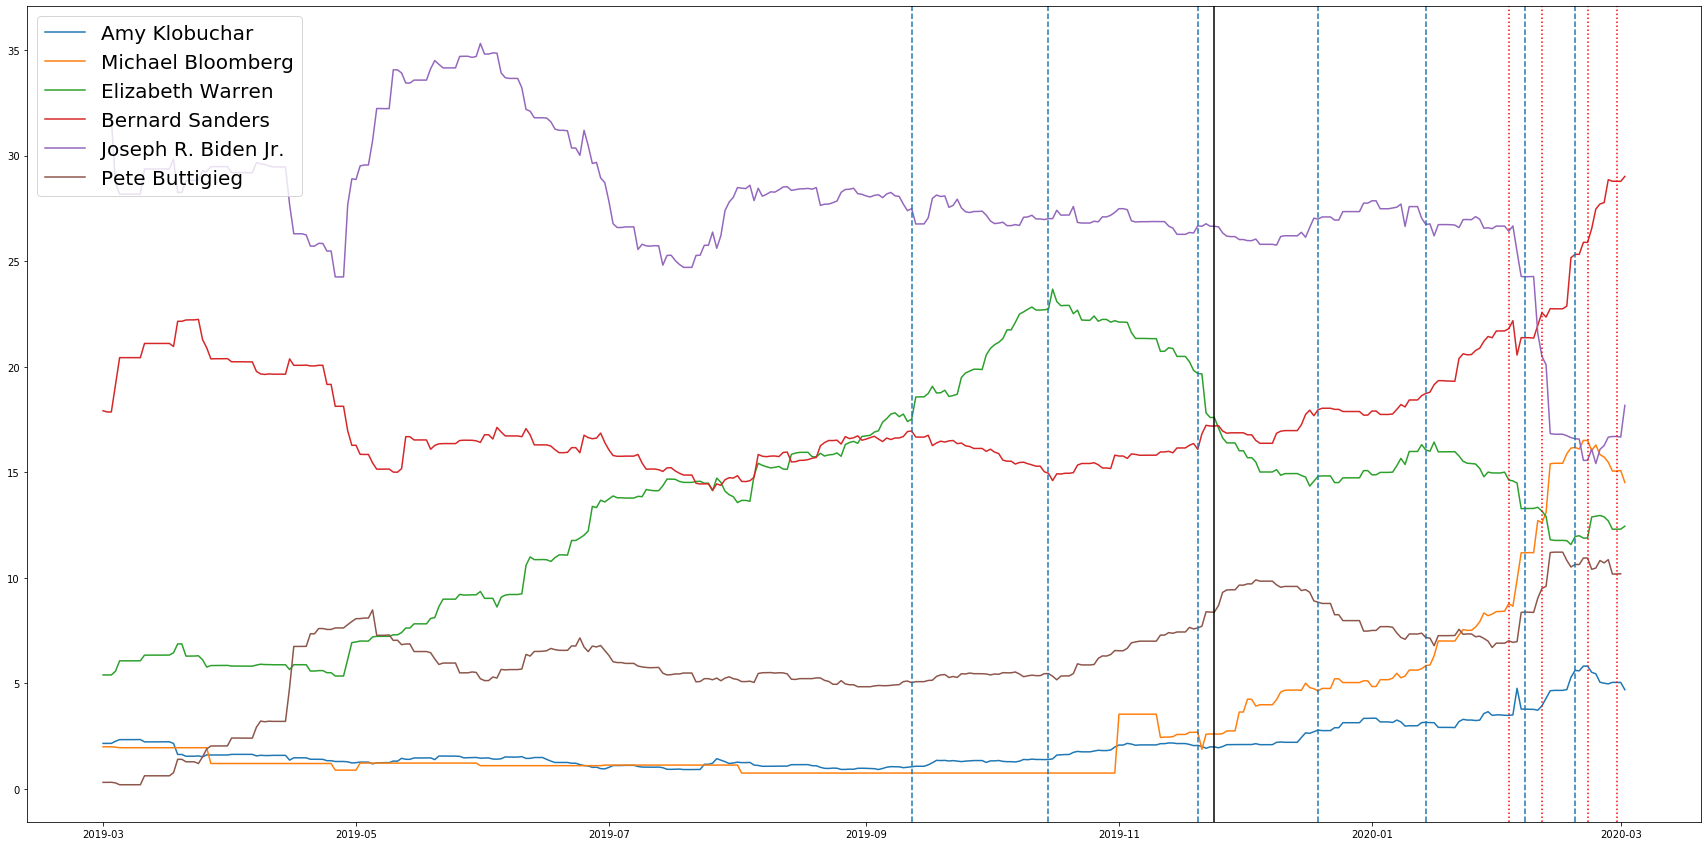

In [197]:
visualize.plot_candidates(df_avg_polls, relevant_candidates)

## Lanes Theory

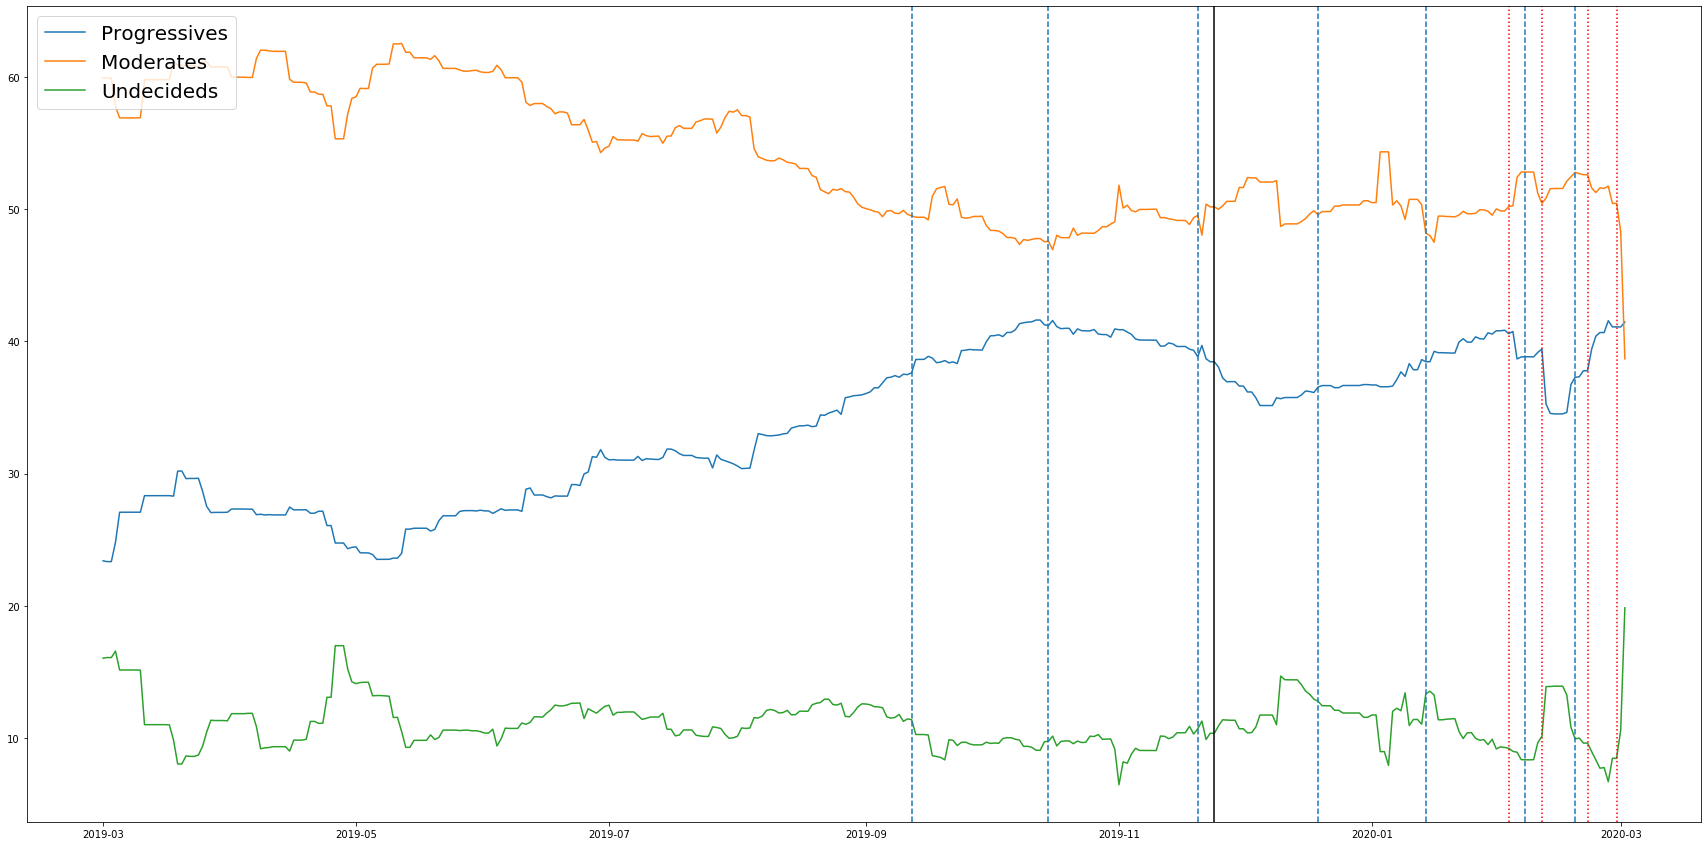

In [198]:
visualize.plot_lanes(df=df_avg_polls, progressives=progressives, moderates=moderates)


### Nationally

prog 34.51362 41.608982690000005
mod 46.924118050000004 54.32109147999999
und 6.485829570000007 14.702137100000002


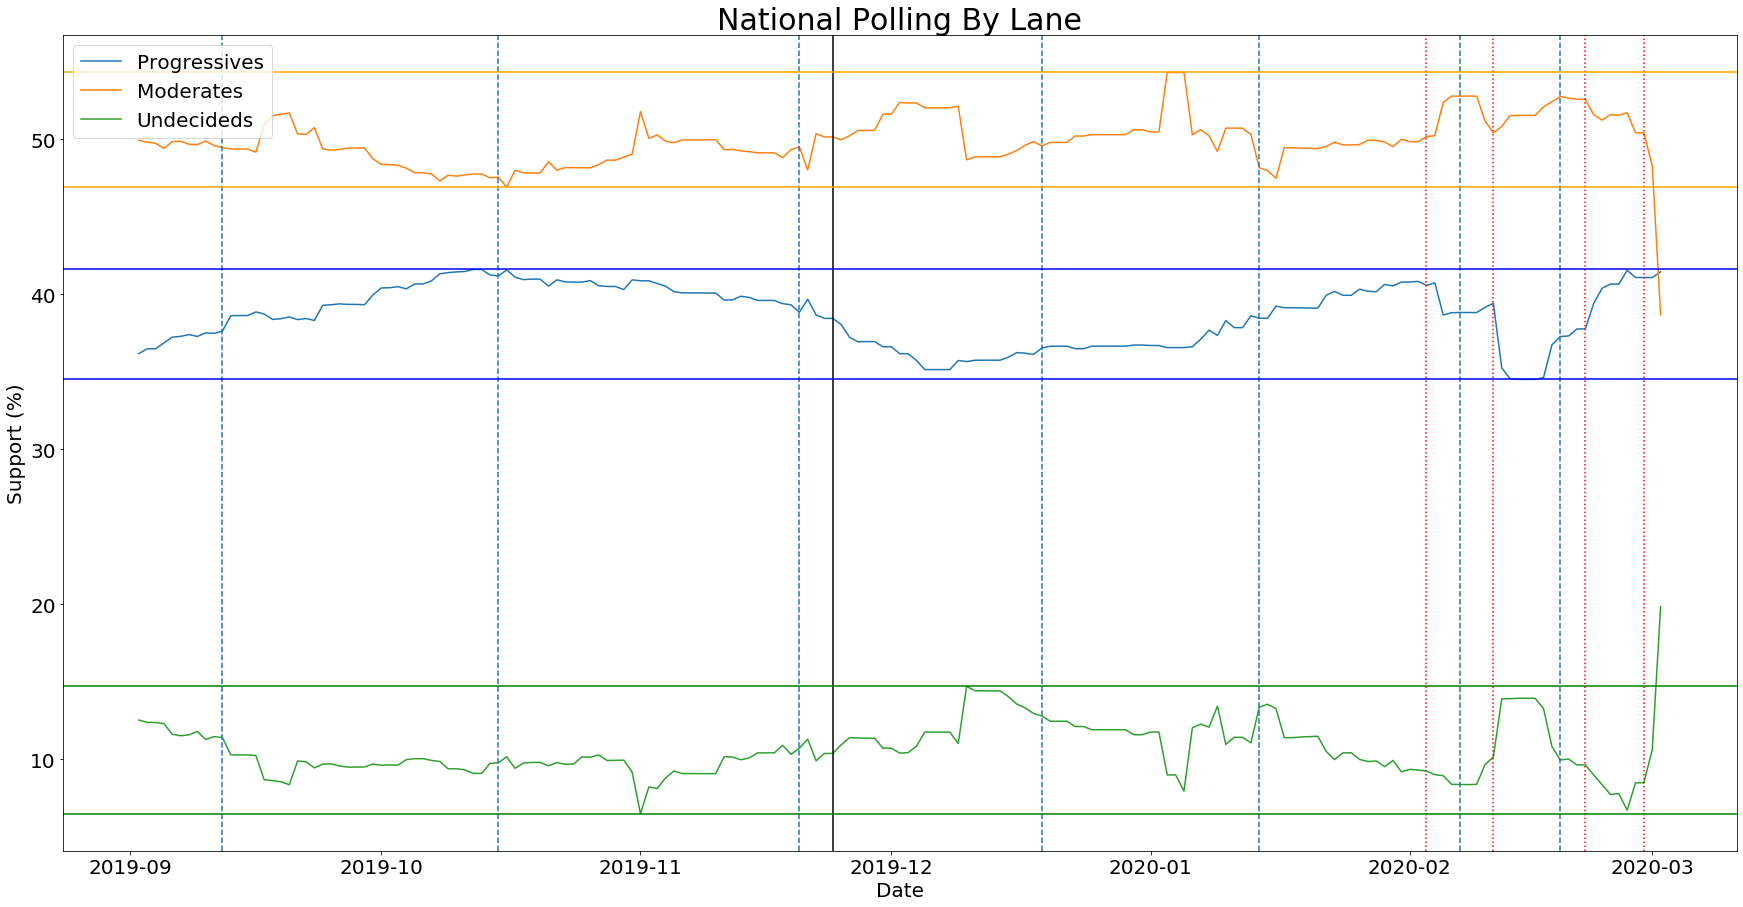

In [232]:
last_month = df_avg_polls[df_avg_polls.modeldate > pd.to_datetime('9/1/2019')]

visualize.plot_lanes(df=last_month, progressives=progressives, moderates=moderates, show_range=True)
# Since November, each lane has been competing within itself

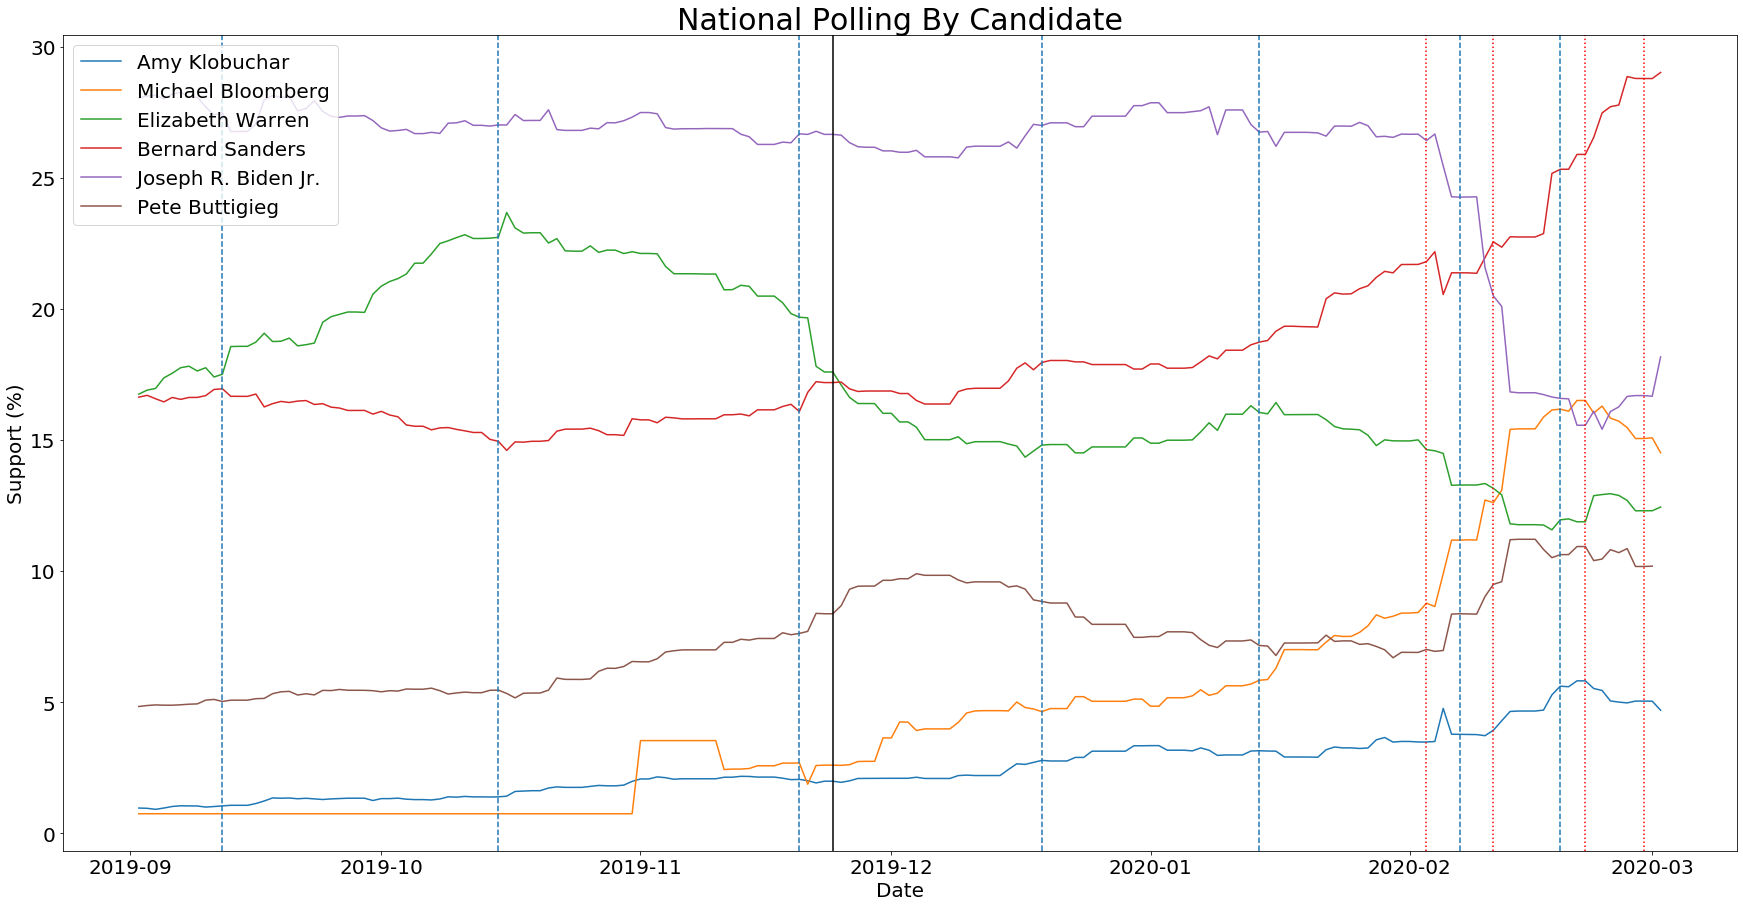

In [222]:
visualize.plot_candidates(last_month, relevant_candidates)

- Looks like the lane theory has been pretty true throughout.
- Since the new year, moderate support has been pretty flat with different candidates jostling within.
- Seems like the progressive lane has been picking up more undecideds since the new year.
- Was a bang of progressive indecision after NH. Looks like some Warrens supporters and Yang dropping out
- Potentially worrisome that moderate support has been consistently above progressive. If they do coalesce around Biden, might not bode well for Bernie
- Seems like since Oct debate (Warren wrecked on healthcare) Warren lost some support to the moderate lane
- Some weird moments:
    - Dec => big jump in moderate undecideds
    - Quickly in the new year, big drop in moderate undecideds
    - Shift from prog => mod between Iowa/NH that was short lived

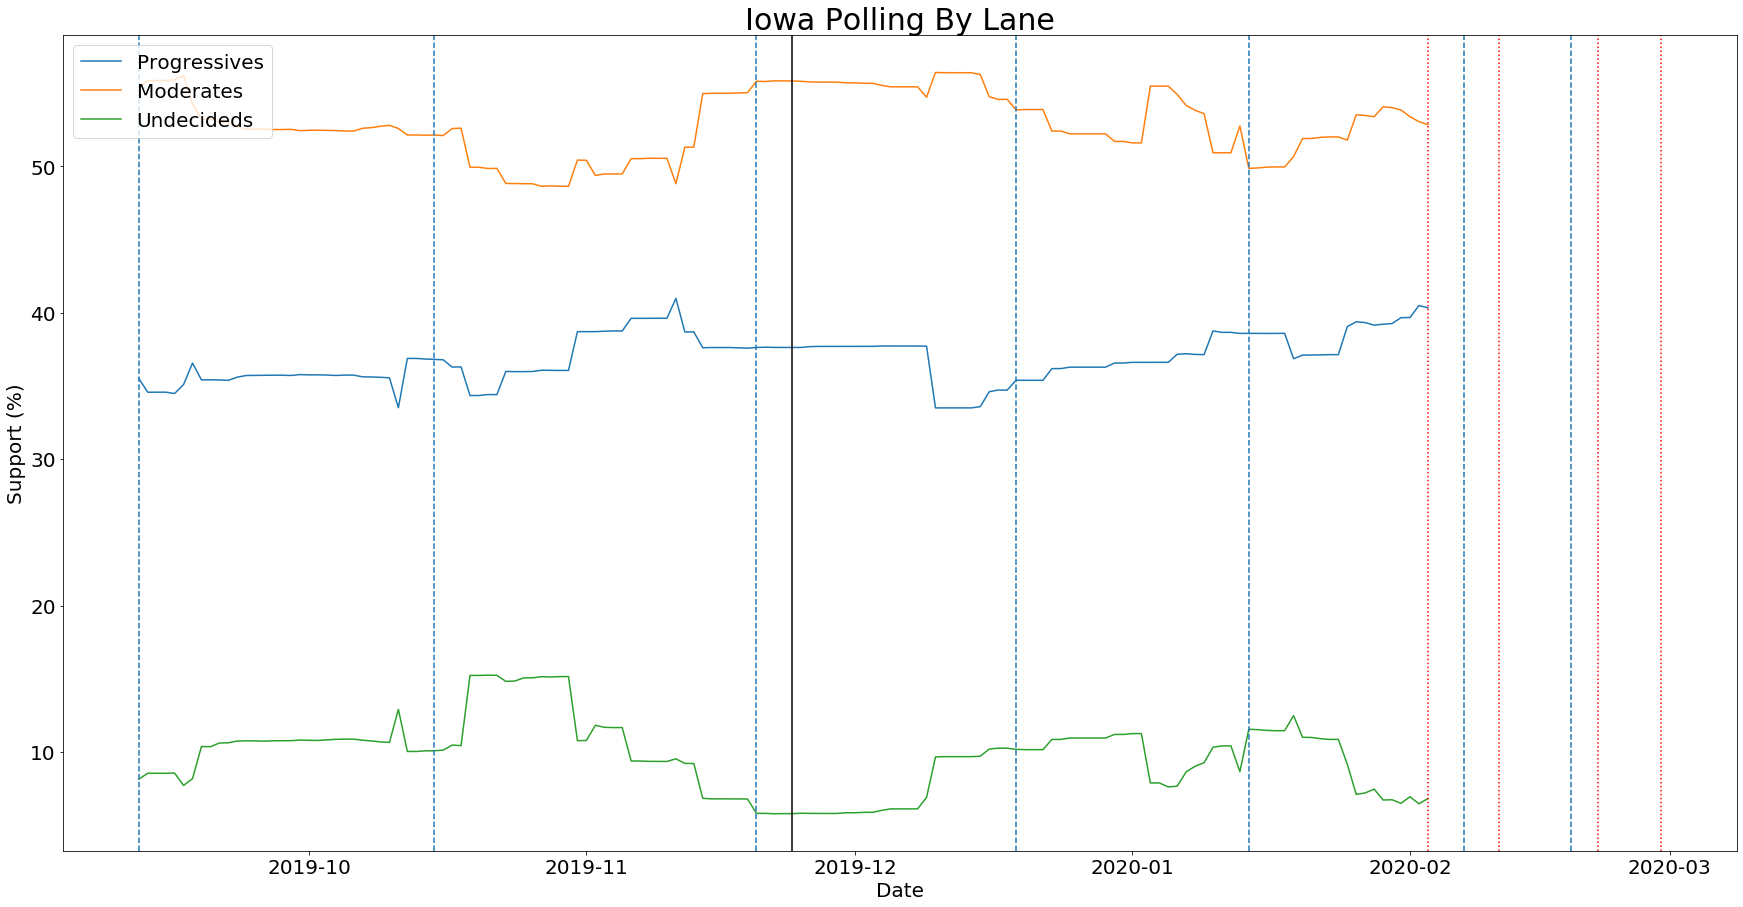

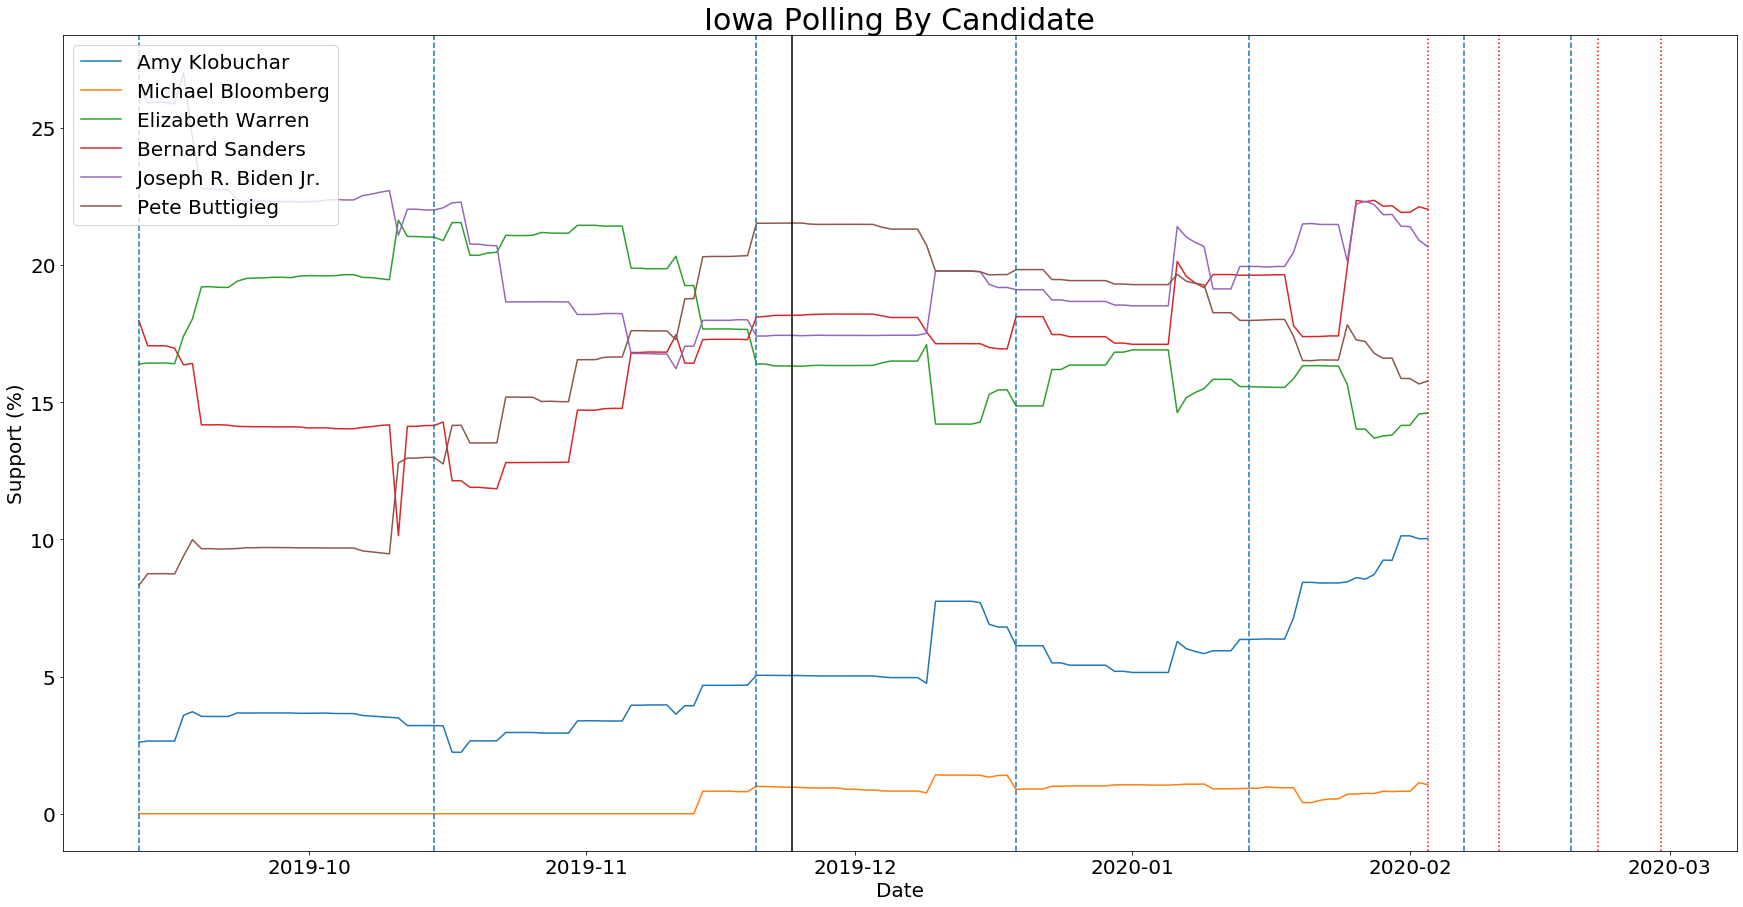

In [233]:
last_month = df_avg_polls[df_avg_polls.modeldate > pd.to_datetime('9/11/2019')]

visualize.plot_lanes(df=last_month, progressives=progressives, moderates=moderates, race='Iowa')
visualize.plot_candidates(last_month, relevant_candidates, race='Iowa')
# Since November, each lane has been competing within itself


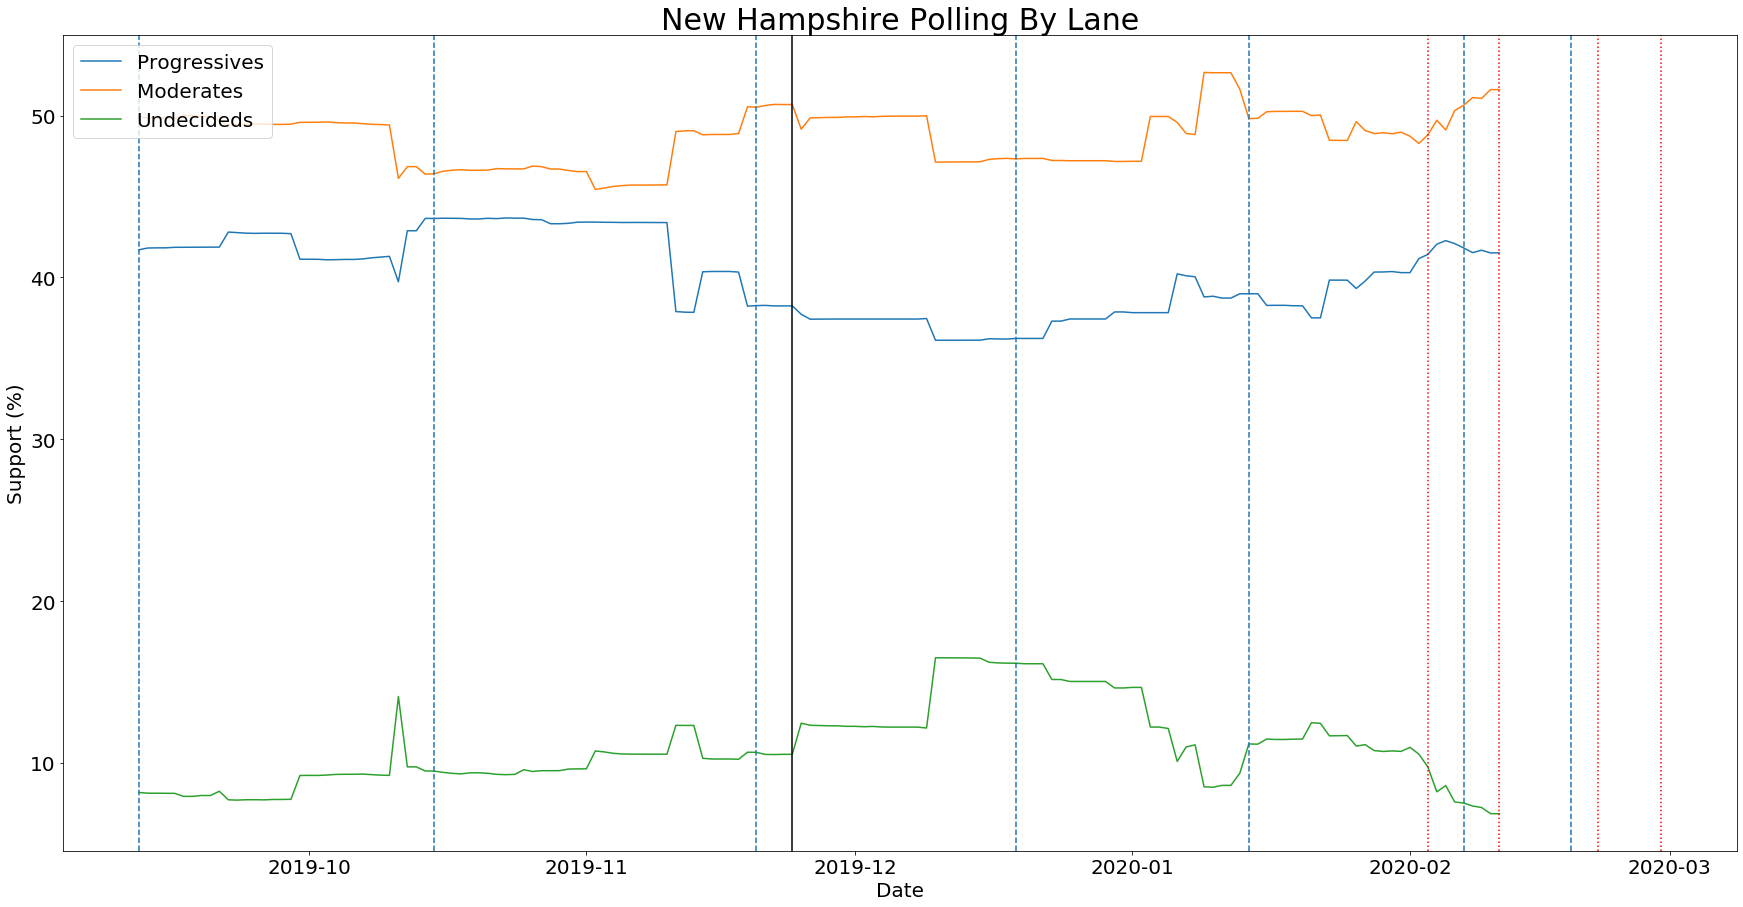

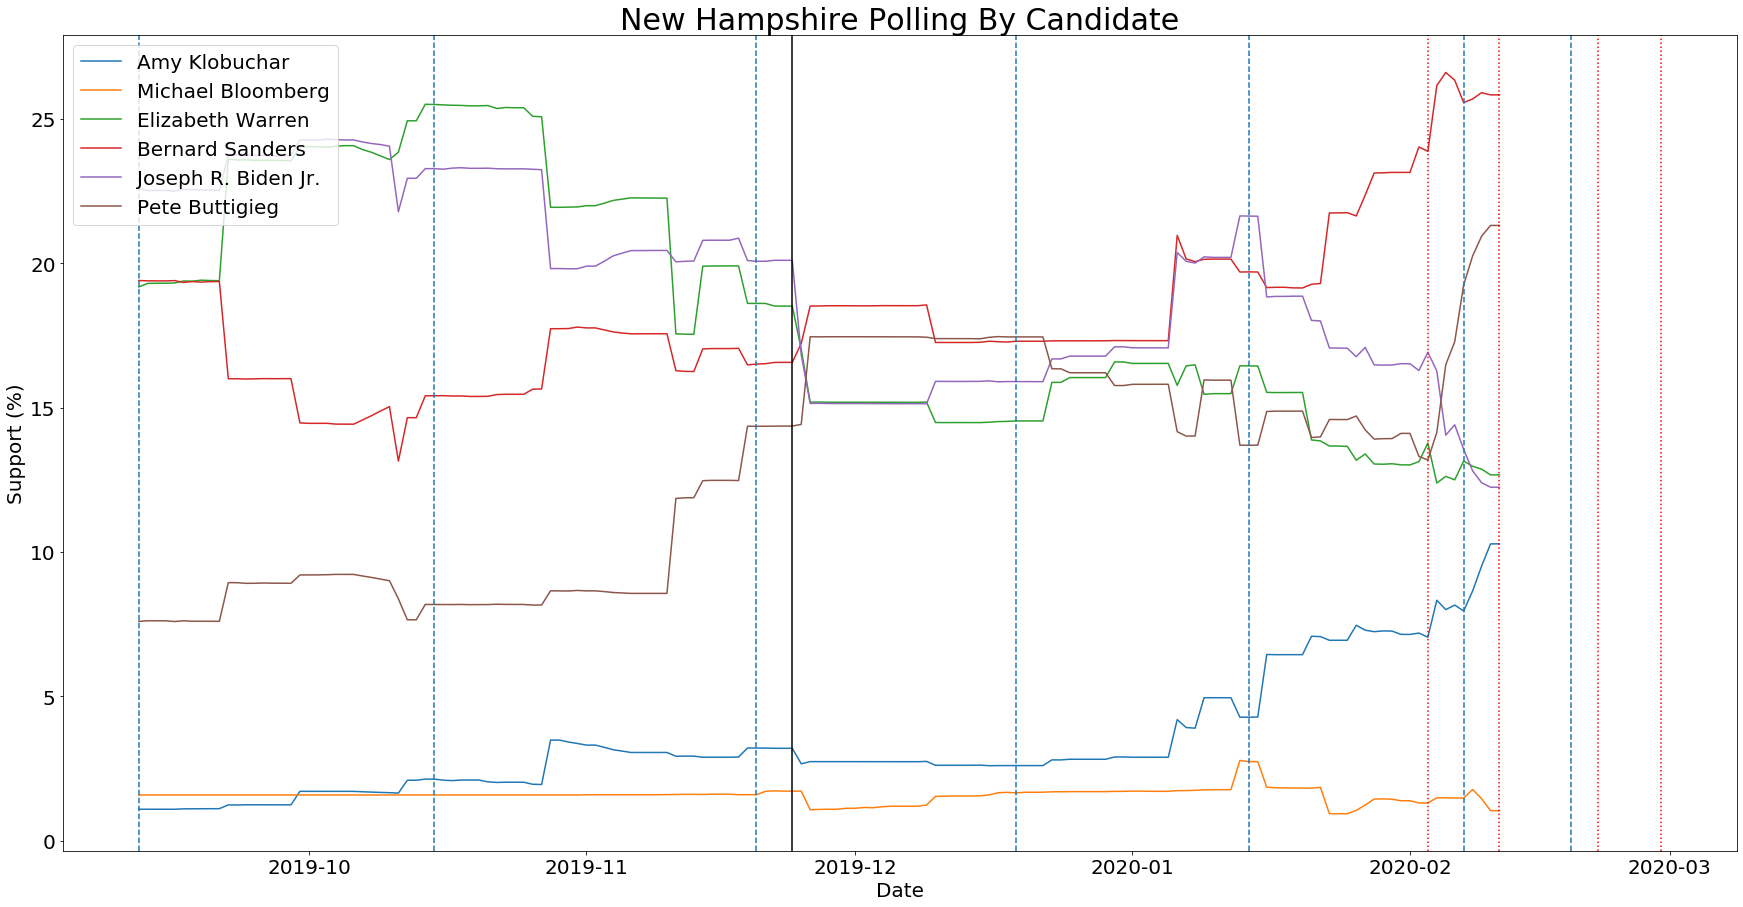

In [234]:
last_month = df_avg_polls[df_avg_polls.modeldate > pd.to_datetime('9/11/2019')]

visualize.plot_lanes(df=last_month, progressives=progressives, moderates=moderates, race='New Hampshire')
visualize.plot_candidates(last_month, relevant_candidates, race='New Hampshire')
# Since November, each lane has been competing within itself


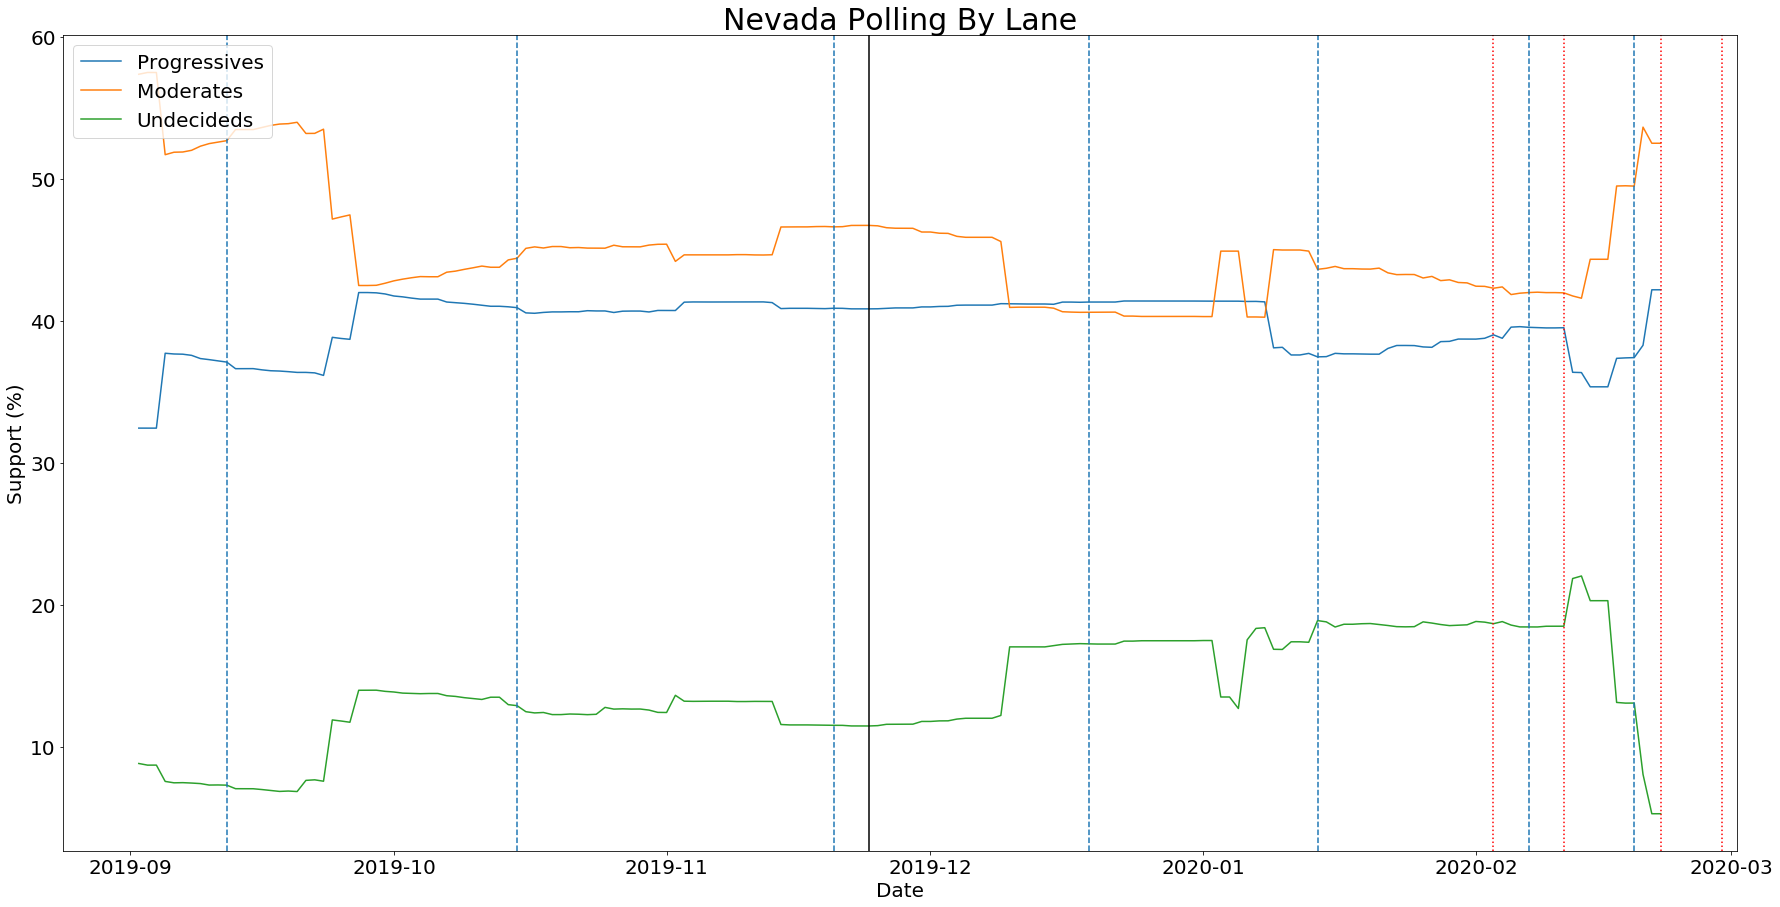

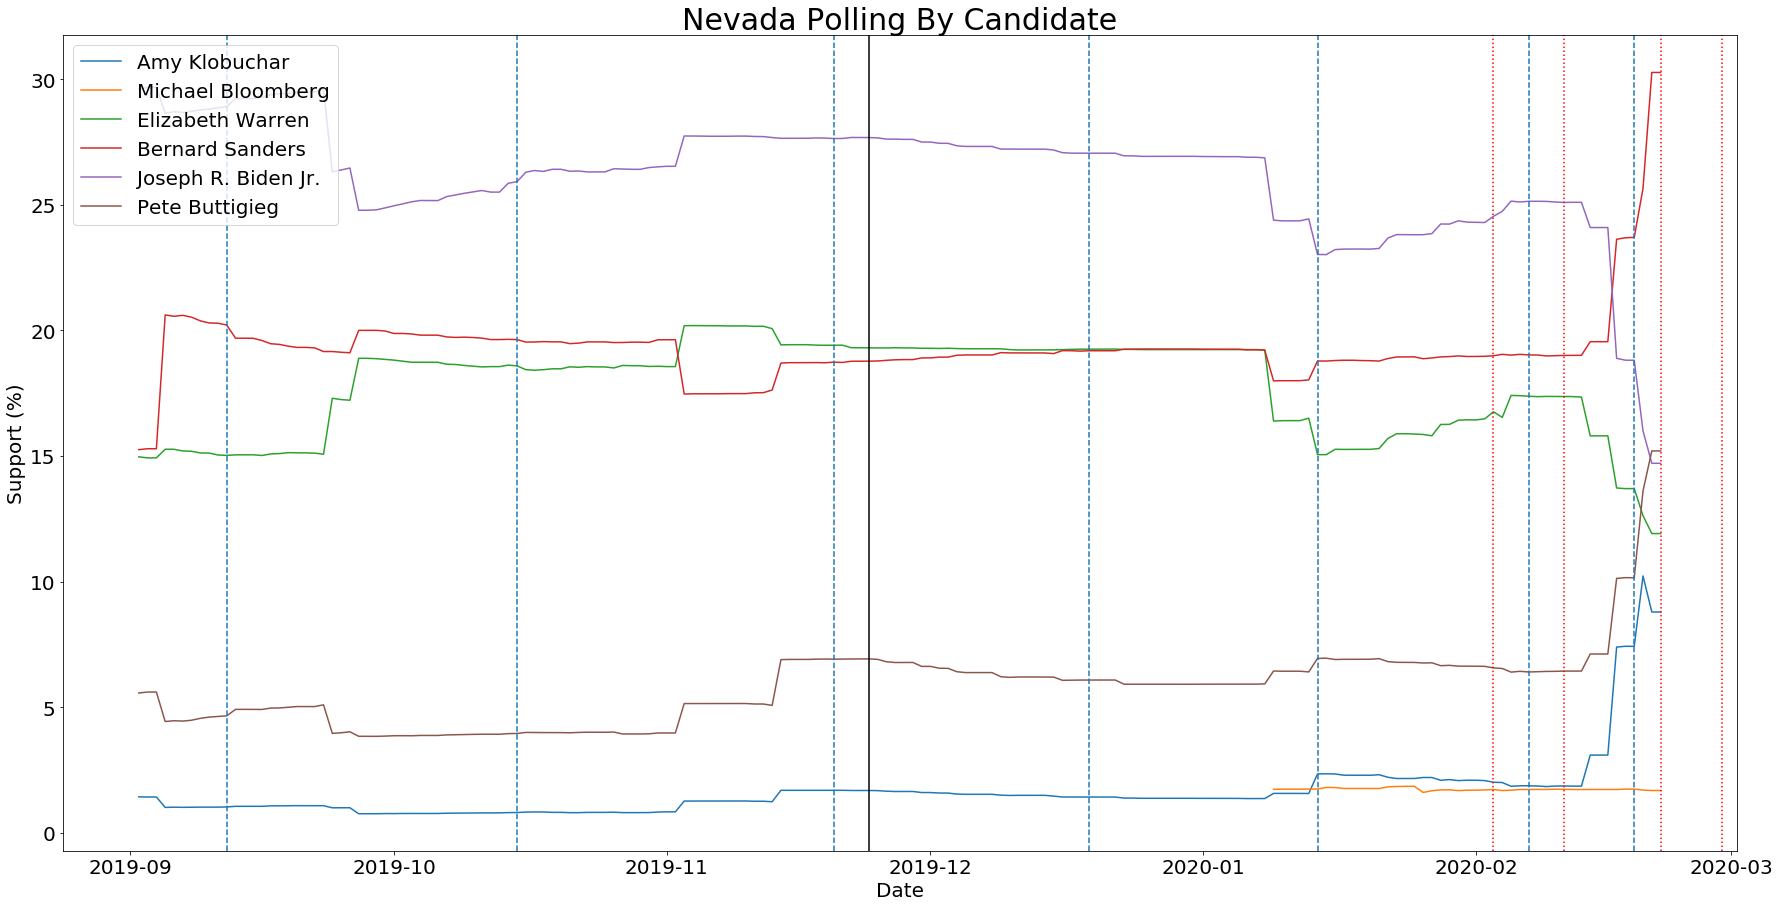

In [235]:
last_month = df_avg_polls[df_avg_polls.modeldate > pd.to_datetime('9/1/2019')]

visualize.plot_lanes(df=last_month, progressives=progressives, moderates=moderates, race='Nevada')
visualize.plot_candidates(last_month, relevant_candidates, race='Nevada')
# Since November, each lane has been competing within itself

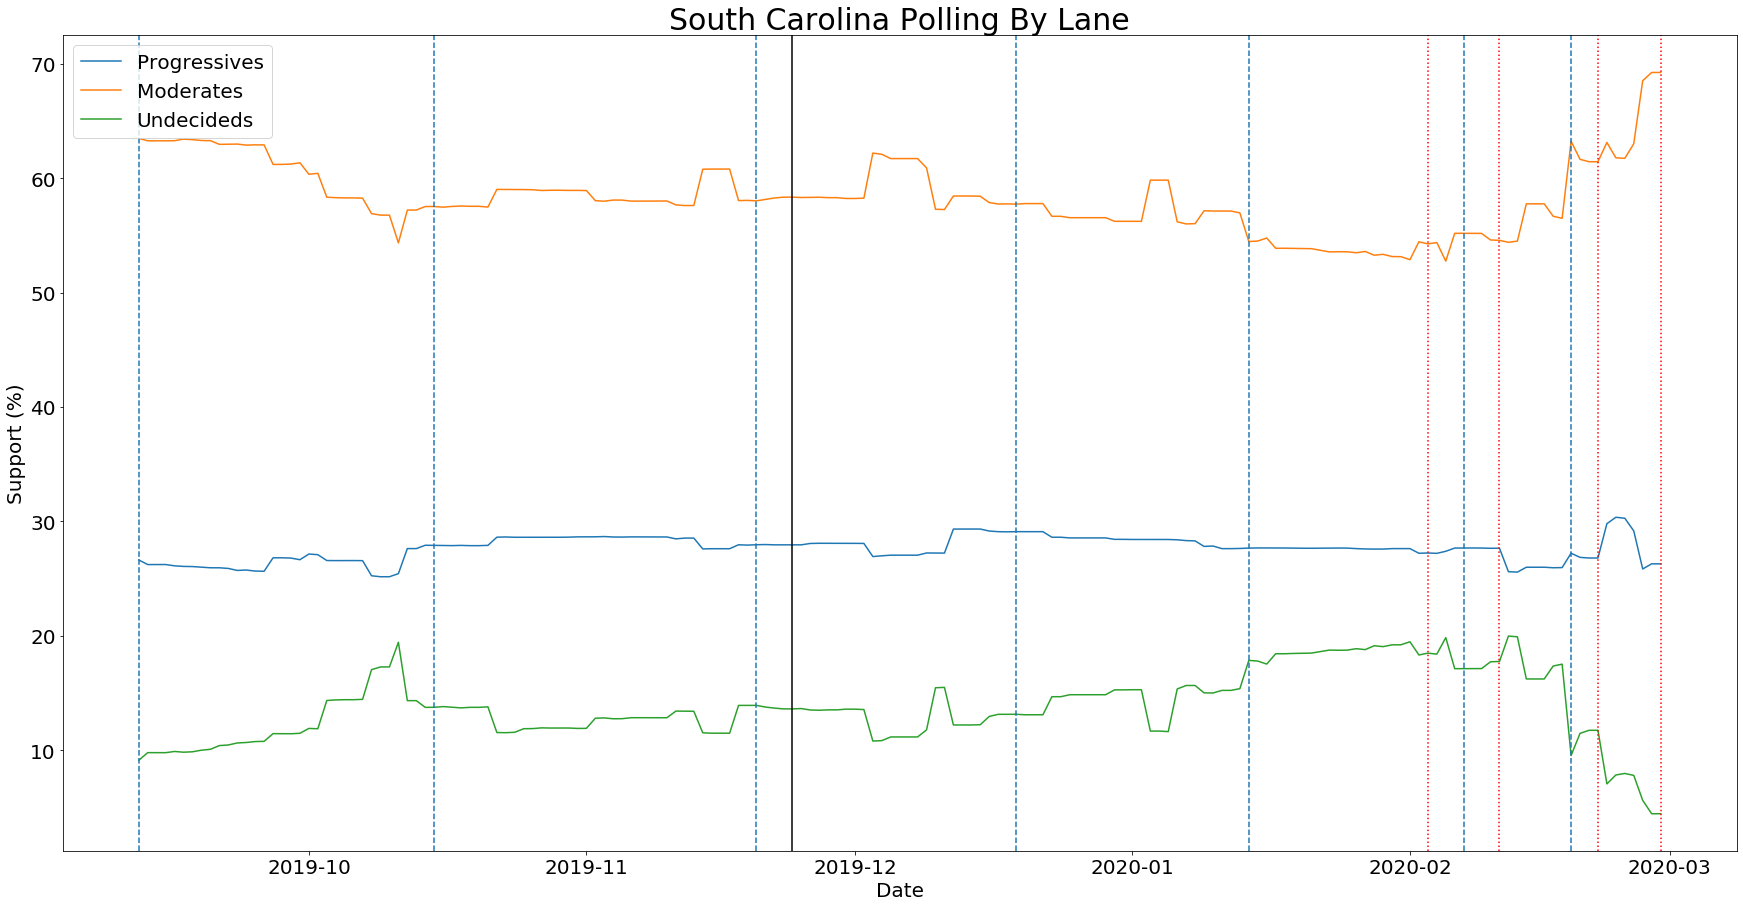

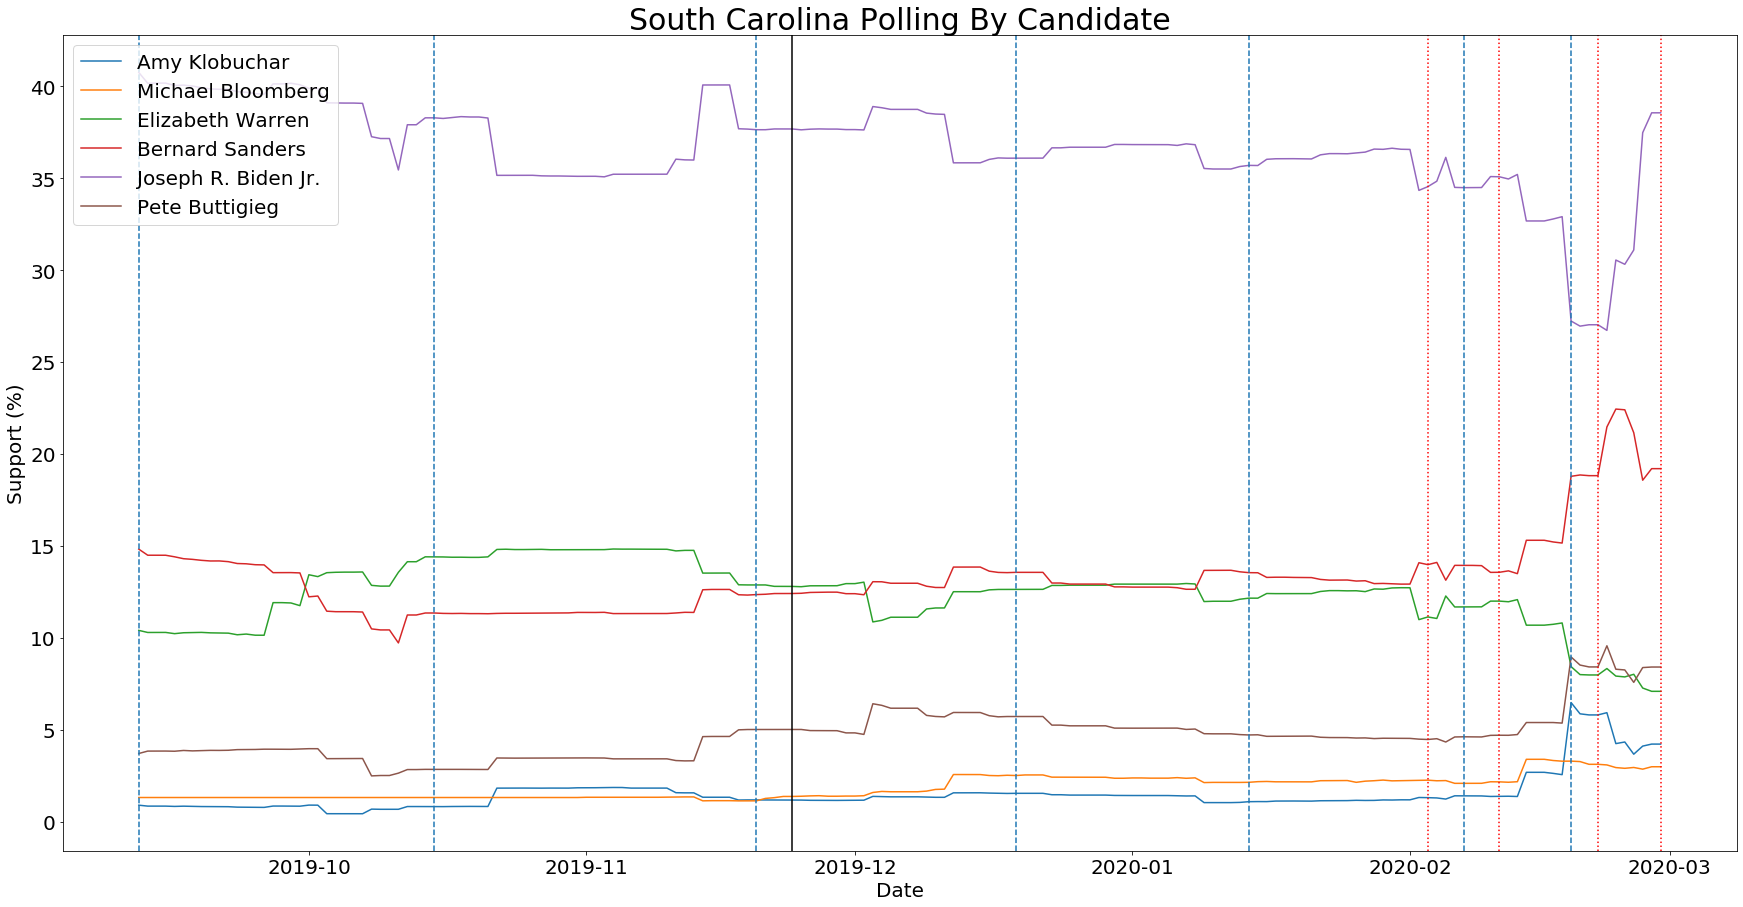

In [236]:
last_month = df_avg_polls[df_avg_polls.modeldate > pd.to_datetime('9/11/2019')]

visualize.plot_lanes(df=last_month, progressives=progressives, moderates=moderates, race='South Carolina')
visualize.plot_candidates(last_month, relevant_candidates, race='South Carolina')
# Since November, each lane has been competing within itself


- Looks like early states are fairly similar to National picture
- One concern is that moderates seem to be picking up more of the late undecideds
    - Might bode poorly for Super Tuesday

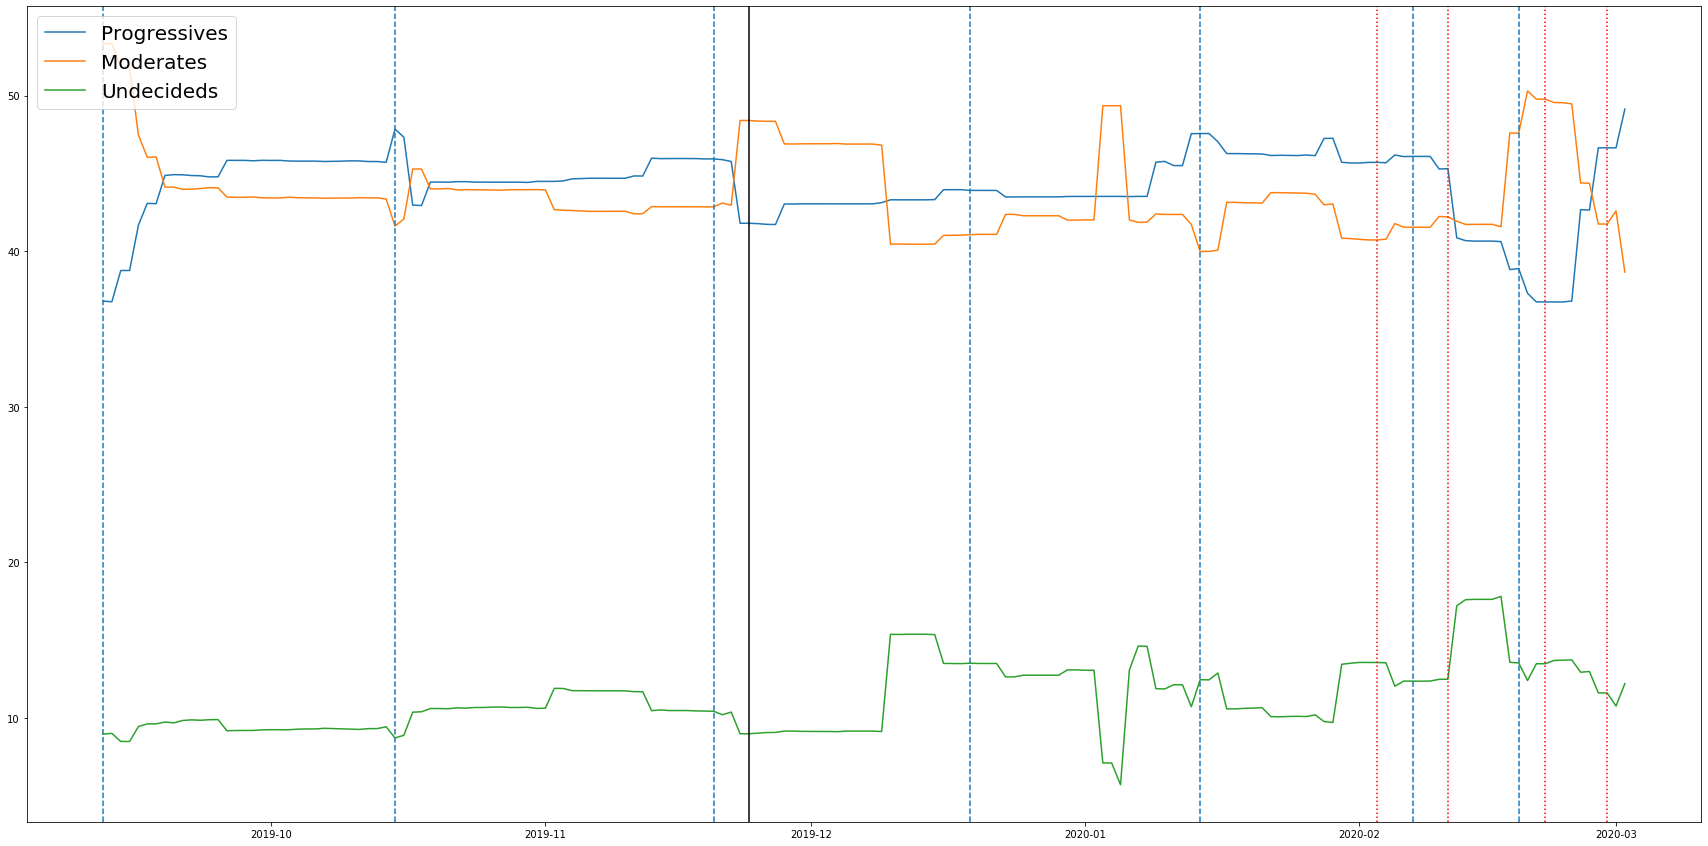

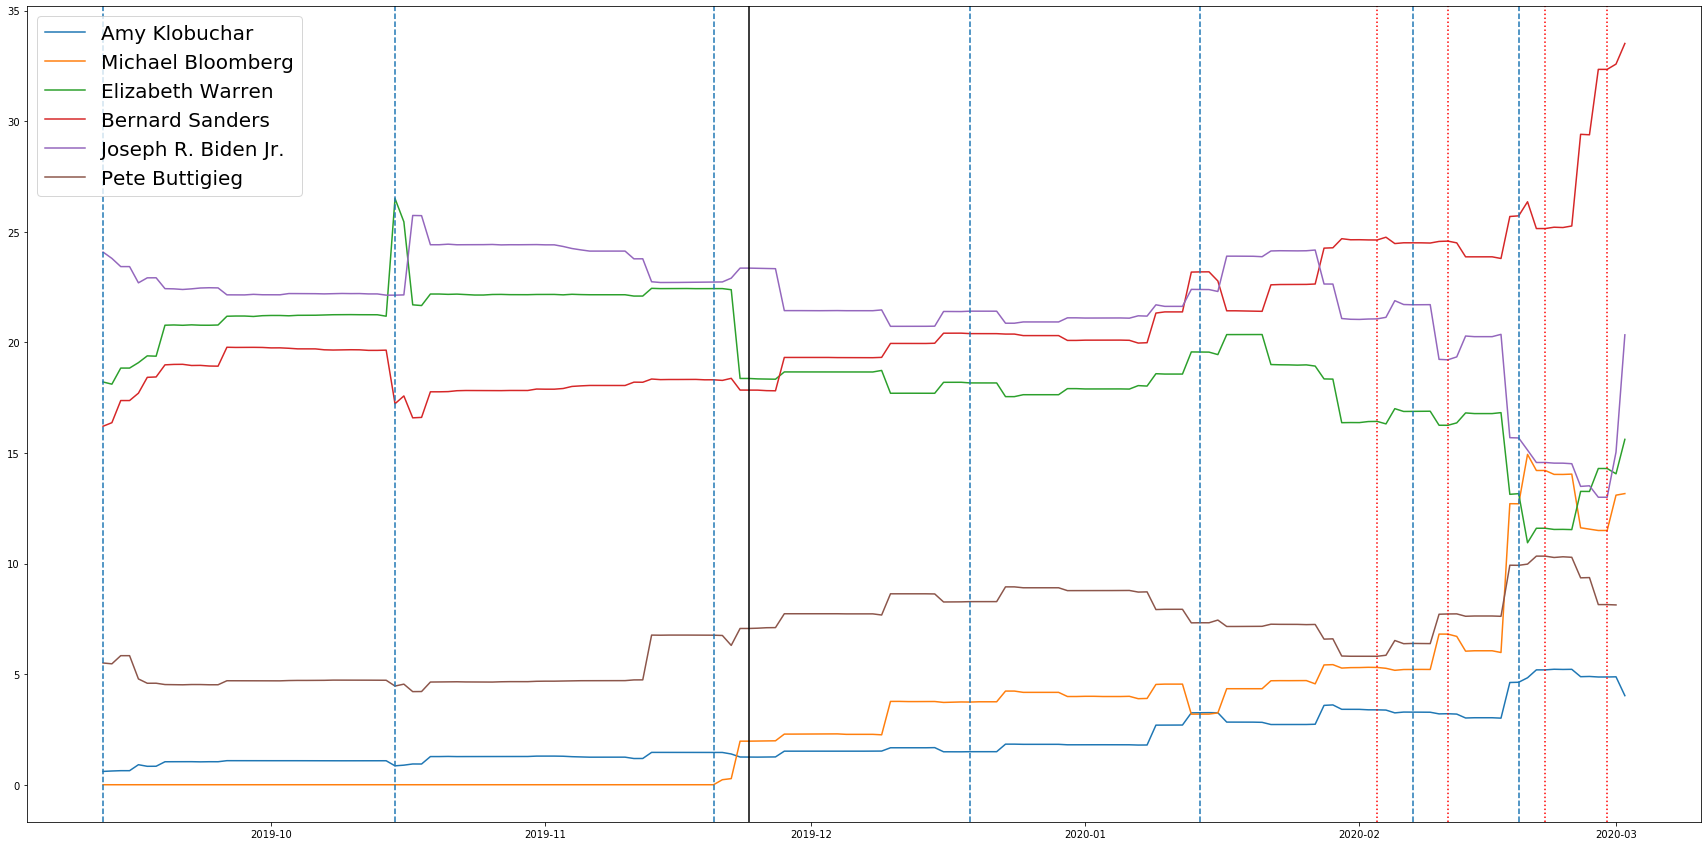

In [204]:
last_month = df_avg_polls[df_avg_polls.modeldate > pd.to_datetime('9/11/2019')]

visualize.plot_lanes(df=last_month, progressives=progressives, moderates=moderates, race='California')
visualize.plot_candidates(last_month, relevant_candidates, race='California')
# Since November, each lane has been competing within itself

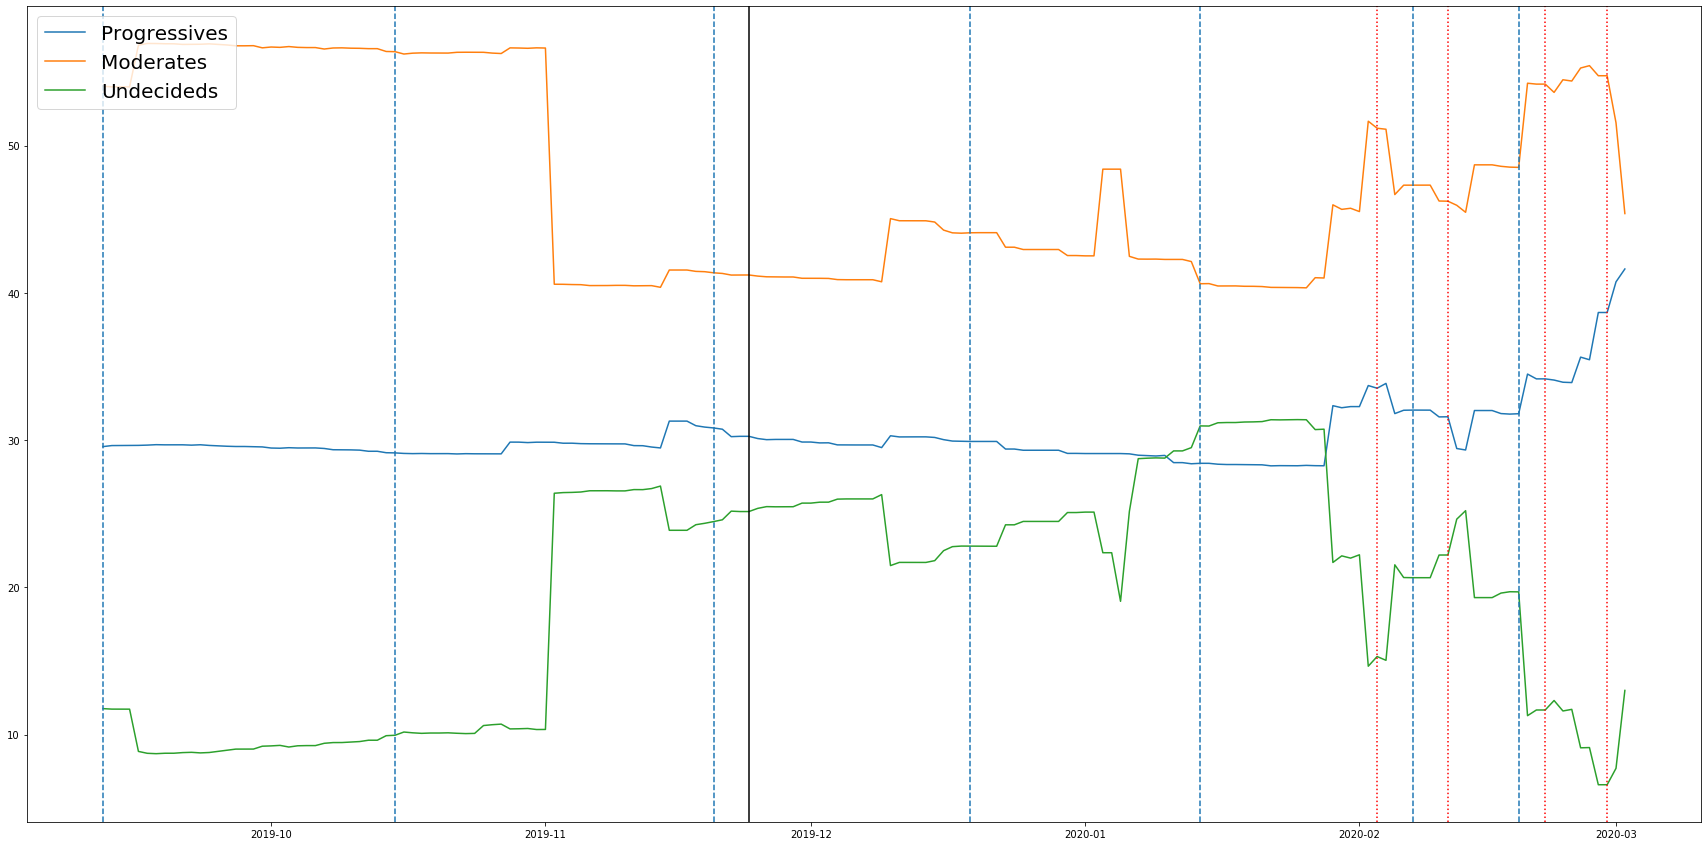

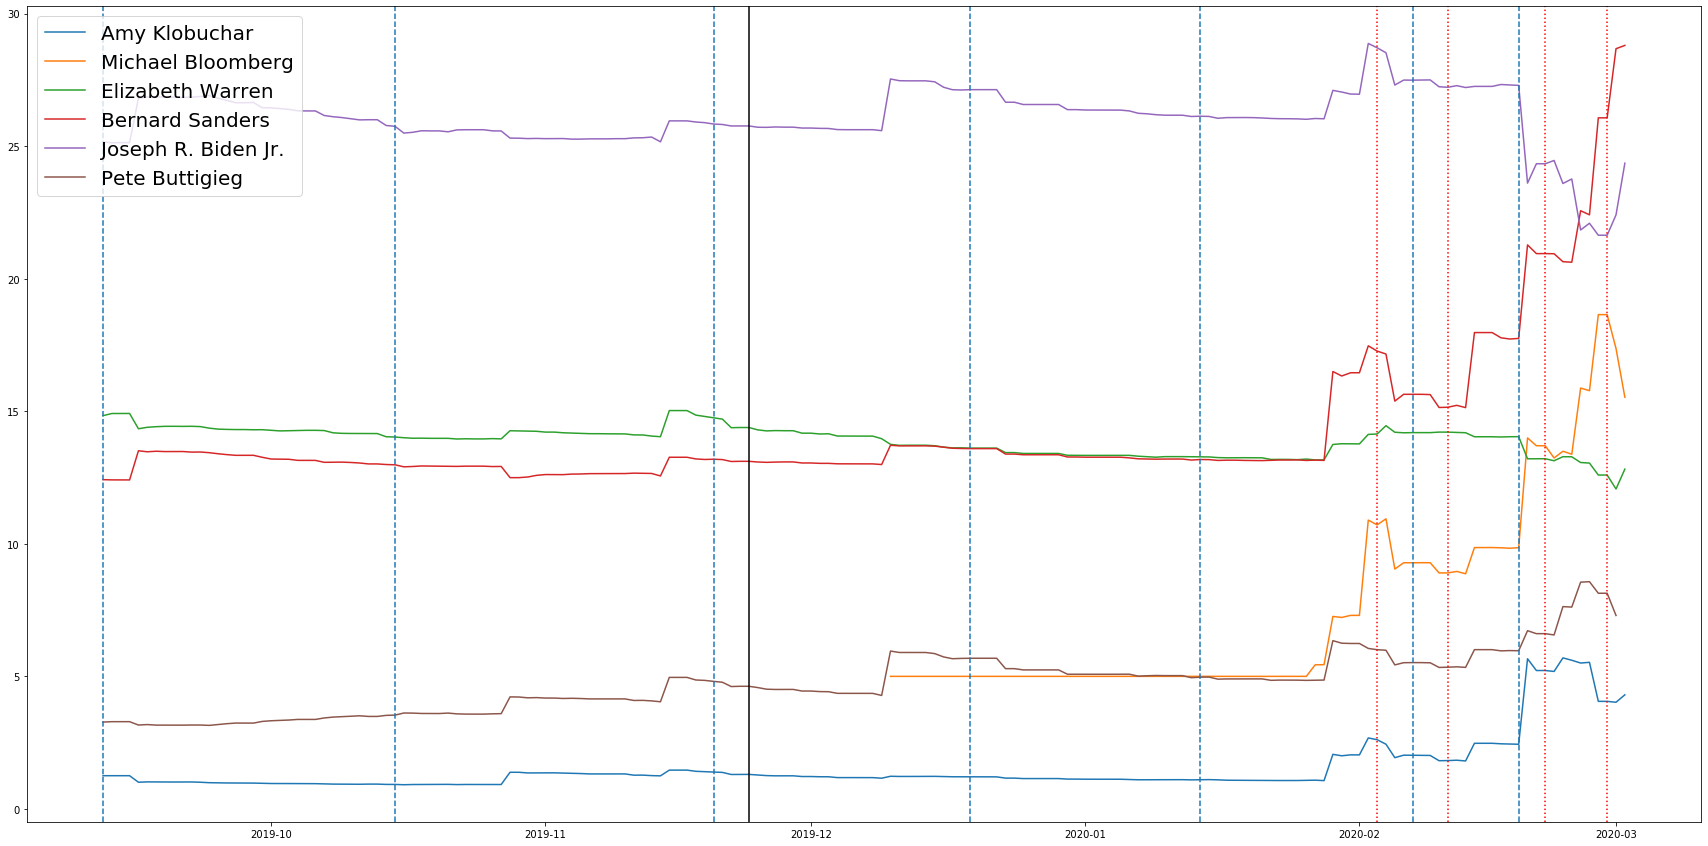

In [205]:
last_month = df_avg_polls[df_avg_polls.modeldate > pd.to_datetime('9/11/2019')]

visualize.plot_lanes(df=last_month, progressives=progressives, moderates=moderates, race='Texas')
visualize.plot_candidates(last_month, relevant_candidates, race='Texas')
# Since November, each lane has been competing within itself

## Pct Adjustment

In [212]:
df_avg_polls.groupby('state').pct_trend_adjusted.agg('mean').sort_values()

state
Oklahoma           4.217074
Iowa               4.460094
New Hampshire      4.651027
Florida            4.677176
South Carolina     4.746175
California         4.864853
Montana            4.886154
Texas              5.023249
Massachusetts      5.049293
North Carolina     5.053065
Pennsylvania       5.222509
Alabama            5.243189
Michigan           5.300044
Nevada             5.348000
Ohio               5.468830
Virginia           5.475470
Wisconsin          5.527162
Mississippi        5.552724
Georgia            5.579325
Tennessee          5.720413
Maryland           5.729630
Illinois           5.958268
Colorado           6.020953
New York           6.070865
Minnesota          6.205964
Arizona            6.225511
Maine              6.287189
New Jersey         6.308975
Delaware           6.463629
Wyoming            6.630916
Washington         7.151172
Oregon             7.652915
New Mexico         7.666156
Utah               9.352344
Missouri          10.806439
Indiana       